# Imports

In [2]:
from __future__ import division, print_function
import numpy as np
import random as rnd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale 
from sklearn.metrics import confusion_matrix,accuracy_score

### Support Vector Machine using the Sequential Minimal Optimization (SMO) algorithm for training insted of solving by optimization method.


# Decomposition algorithm
## where only two alpha’s get updated at a time.


### Limits for alphas

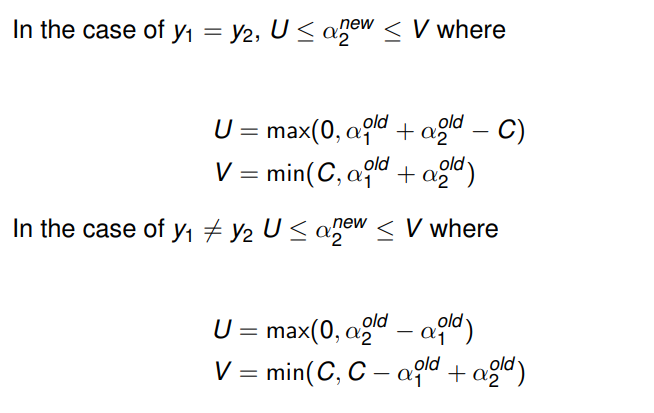

### Error 

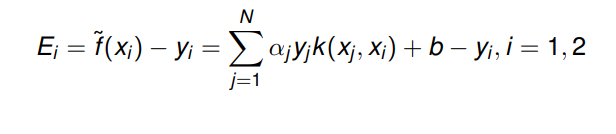

# Alpha update

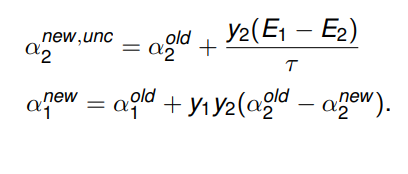

In [3]:
class SVM():
   
    def __init__(self, kernel_type='linear', C=1.0, epsilon=0.001):
        self.kernel  = self.kernel_linear 
        self.kernel_type = kernel_type
        self.C = C
        self.epsilon = epsilon
        
       
    def kernel_linear(self, x1, x2):
        return np.dot(x1, x2.T)
    
    def compute_limit(self, C, alpha_2, alpha_1, y_j, y_i):
        if(y_i != y_j):
            return (max(0, alpha_2 - alpha_1), min(C, C - alpha_1 + alpha_2))
        else:
            return (max(0, alpha_1 + alpha_2 - C), min(C, alpha_1 + alpha_2))
    
    def get_rnd_int(self, a,b,z):
        i = z
        cnt=0
        while i == z and cnt<1000:
            i = rnd.randint(a,b)
            cnt=cnt+1
        return i
   
    def fit(self, X, y):
        # Initialization
        n, d = X.shape[0], X.shape[1]
        alpha = np.zeros((n))
        kernel = self.kernel
        count = 0
        while True:
            count += 1
            alpha_prev = np.copy(alpha)
            for j in range(0, n):
                i = self.get_rnd_int(0, n-1, j) # Get random int i~=j
                x_i, x_j, y_i, y_j = X[i,:], X[j,:], y[i], y[j]
                k_ij = kernel(x_i, x_i) + kernel(x_j, x_j) - 2 * kernel(x_i, x_j)
                if k_ij == 0:
                    continue
                alpha_prime_j, alpha_prime_i = alpha[j], alpha[i]
                (L, H) = self.compute_limit(self.C, alpha_prime_j, alpha_prime_i, y_j, y_i)

                # Compute model parameters
                self.w = self.calc_weights(alpha, y, X)
                self.b = self.calc_bias(X, y, self.w)

                # Compute E_i, E_j
                E_i = self.Error(x_i, y_i, self.w, self.b)
                E_j = self.Error(x_j, y_j, self.w, self.b)

                # Set new alpha values
                alpha[j] = alpha_prime_j + float(y_j * (E_i - E_j))/k_ij
                alpha[j] = max(alpha[j], L)
                alpha[j] = min(alpha[j], H)

                alpha[i] = alpha_prime_i + y_i*y_j * (alpha_prime_j - alpha[j])

            # Check convergence
            diff = np.linalg.norm(alpha - alpha_prev)
            if diff < self.epsilon:
                break

        # Compute final model parameters
        self.b = self.calc_bias(X, y, self.w)
        
        if self.kernel_type == 'linear':
            self.w = self.calc_weights(alpha, y, X)
            
        # Get support vectors
        alpha_idx = np.where(alpha > 0)[0]
        support_vectors = X[alpha_idx, :]
        return support_vectors, count
    
    def calc_bias(self, X, y, w):
        b_tmp = y - np.dot(w.T, X.T)        
        return np.mean(b_tmp)
    
    def calc_weights(self, alpha, y, X):
        return np.dot(X.T, np.multiply(alpha,y))

    def predict(self, X):
        prediction=np.sign(np.dot(self.w.T, X.T) + self.b).astype(int)
        return prediction  
    
    def calculate(self,x,w,b):
        return np.sign(np.dot(w.T, x.T) + self.b).astype(int)
  
    def Error(self, x_k, y_k, w, b):
        return self.calculate(x_k, w, b) - y_k
    
  
  

# Assignment 3

In [4]:
df=pd.read_csv('data6.csv',header=None)
data1 = pd.DataFrame({"X1": df.iloc[:,0], "X2": df.iloc[:,1], "X3": df.iloc[:,2],"Classs": df.iloc[:,3]})
#Spliting data
target6 = np.array(data1.iloc[:,-1])
feature6 = np.array(data1.iloc[:,0:data1.shape[1]- 1])
feature6 = scale(feature6)
data1.head()

,X1,X2,X3,Classs
0,18.6810,8.82880,-4.0912,1
1,10.4240,-12.28300,1.7617,1
2,-8.9739,16.95600,-10.6010,1
3,-11.0960,-0.15696,-14.6030,1
4,-6.3750,-7.11920,-7.3089,1


In [6]:
def test(feature,target):
        # Initialize model
        X_train, X_test, y_train, y_test = train_test_split(feature,target,test_size=0.2)       
        model = SVM()
        # Fit model
        support_vectors, iterations = model.fit(X_train, y_train)
        # Support vector count
        sv_count = support_vectors.shape[0]
        # Make prediction
        y_hat = model.predict(X_test)
        # Calculate accuracy
        acc = accuracy_score( y_test, y_hat)
        print("Support vector count: %d" % (sv_count))
        print("bias:\t\t%.3f" % (model.b))
        print("w:\t\t" + str(model.w))
        print("accuracy:\t%.3f" % (acc))
        print("Converged after %d iterations" % (iterations))
        print("support_vectors")
        print(support_vectors)               

In [7]:
test(feature6,target6)        

Support vector count: 50
bias:		0.387
w:		[3.50518051 2.86955287 2.2580174 ]
accuracy:	0.750
Converged after 6 iterations
support_vectors
[[-1.50500087  1.24558603 -0.89672152]
 [-0.62227337  0.88122405  1.36626592]
 [ 0.47000964  0.82030052  1.22486373]
 [ 0.15421017  1.17350579  0.12157864]
 [-0.49774765 -0.02692652  0.34597729]
 [-1.47022938 -0.95159144 -0.47489006]
 [-1.5271976   0.5461114  -1.50966689]
 [ 0.59077312 -0.05341238 -3.07796082]
 [ 0.14027103  0.22881321  0.82132617]
 [ 0.29896241 -0.57897529 -0.44522874]
 [-0.25668907 -0.52769673 -0.28079345]
 [ 0.9591931  -1.46915417 -0.16286623]
 [ 0.7052543   0.03102793  1.50203412]
 [ 1.26154725 -0.33389038  0.35343405]
 [ 0.95002931  0.39095747 -0.62628983]
 [-1.92877523 -0.18706922 -0.41330277]
 [ 1.00404476 -0.05651449  1.63758138]
 [ 0.57307173 -0.09965379  1.43939737]
 [ 1.31235537 -2.67540974 -1.88095812]
 [-0.35611619 -0.3941185  -0.24903319]
 [-0.23769966 -1.45083176 -1.80059085]
 [ 0.64312381 -1.28393456 -0.14248443]
 [-0

In [8]:
df7=pd.read_csv('data7.csv',header=None)
data7 = pd.DataFrame({"X1": df7.iloc[:,0], "X2": df7.iloc[:,1], "X3": df7.iloc[:,2],"Classs": df7.iloc[:,3]})
#Spliting data
target7 = np.array(data7.iloc[:,-1])
feature7 = np.array(data7.iloc[:,0:data7.shape[1]- 1])
feature7 = scale(feature7)
data7.head()

,X1,X2,X3,Classs
0,-4.13560,4.96760,-2.53770,1
1,-3.32060,6.86290,-0.57229,1
2,-9.11180,-0.26998,-18.80100,1
3,1.94460,-2.57100,-11.51600,1
4,0.72804,-6.30350,-12.44300,1


In [9]:
test(feature7,target7)

Support vector count: 19
bias:		-0.018
w:		[ 2.59453184  2.17470425 -2.55279876]
accuracy:	0.900
Converged after 3 iterations
support_vectors
[[ 0.45928884 -0.7824521  -0.35922897]
 [ 1.67847391  0.22643931  1.2031732 ]
 [-0.59942496  0.8327289   0.01815117]
 [ 0.31489988 -0.69511146  0.08900019]
 [ 0.24656798 -1.6223565   0.63631591]
 [ 0.32131137  0.32688104 -0.08195591]
 [-0.01929645 -1.17216688  0.07948996]
 [ 1.38100712  0.95983308  0.07592905]
 [-0.40704995  2.65851216  0.73266667]
 [-1.96960262  1.1547868  -0.90364603]
 [-0.27512901 -1.64932934  1.12727595]
 [ 1.15852643 -0.72058581  0.77523471]
 [ 1.35818262 -1.50429679 -0.49435887]
 [ 0.22126585  0.8296784   0.71127409]
 [-0.0175166  -0.24800446 -1.61756443]
 [ 0.50464052 -0.0410521   0.10894344]
 [-0.1027975  -1.30799442 -2.15191759]
 [-0.49718497  1.09183946  0.60511238]
 [ 0.138948    1.11997899  0.55770564]]


# Adult data

In [10]:
df=pd.read_csv('adult.data',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# After Preprocessing 

In [11]:
df1=pd.read_csv('file1.csv')
df1=df1.drop(['Unnamed: 0'], axis=1)
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital,occupation,relationship,race,gender,capital gain,capital loss,hours per week,country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  int64 
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  int64 
 4   educational-num  32561 non-null  int64 
 5   marital          32561 non-null  int64 
 6   occupation       32561 non-null  int64 
 7   relationship     32561 non-null  int64 
 8   race             32561 non-null  int64 
 9   gender           32561 non-null  int64 
 10  capital gain     32561 non-null  int64 
 11  capital loss     32561 non-null  int64 
 12  hours per week   32561 non-null  int64 
 13  country          32561 non-null  object
 14  income           32561 non-null  int64 
dtypes: int64(14), object(1)
memory usage: 3.7+ MB


In [12]:
target = np.array(df1.iloc[:,-1])
feature = np.array(df1.iloc[:,0:df1.shape[1]- 1])
# feature = scale(feature)
test(feature,target)

TypeError: can't multiply sequence by non-int of type 'str'